In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import numpy as np

### Dataset until first failure contains around 173.000 observations:

In [8]:
path_original = "../../../data/cpps_data/samples_obs_space_sinusoid_20190624091401.csv"
df_original = pd.read_csv(path_original, sep=";")

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.494576,0.347100,0.473339,0.324278,0.418120,0.492362,0.362985,0.378010,0.420207,0.584482
1,0.456478,0.326583,0.457429,0.412444,0.458723,0.503751,0.286235,0.353630,0.427131,0.524308
2,0.470024,0.318676,0.460808,0.369919,0.443505,0.500449,0.296267,0.347587,0.416764,0.553657
3,0.483171,0.377457,0.494283,0.488931,0.506345,0.545058,0.324104,0.404843,0.478427,0.535272
4,0.462173,0.372855,0.466094,0.420378,0.443782,0.497745,0.352782,0.402831,0.448269,0.512720


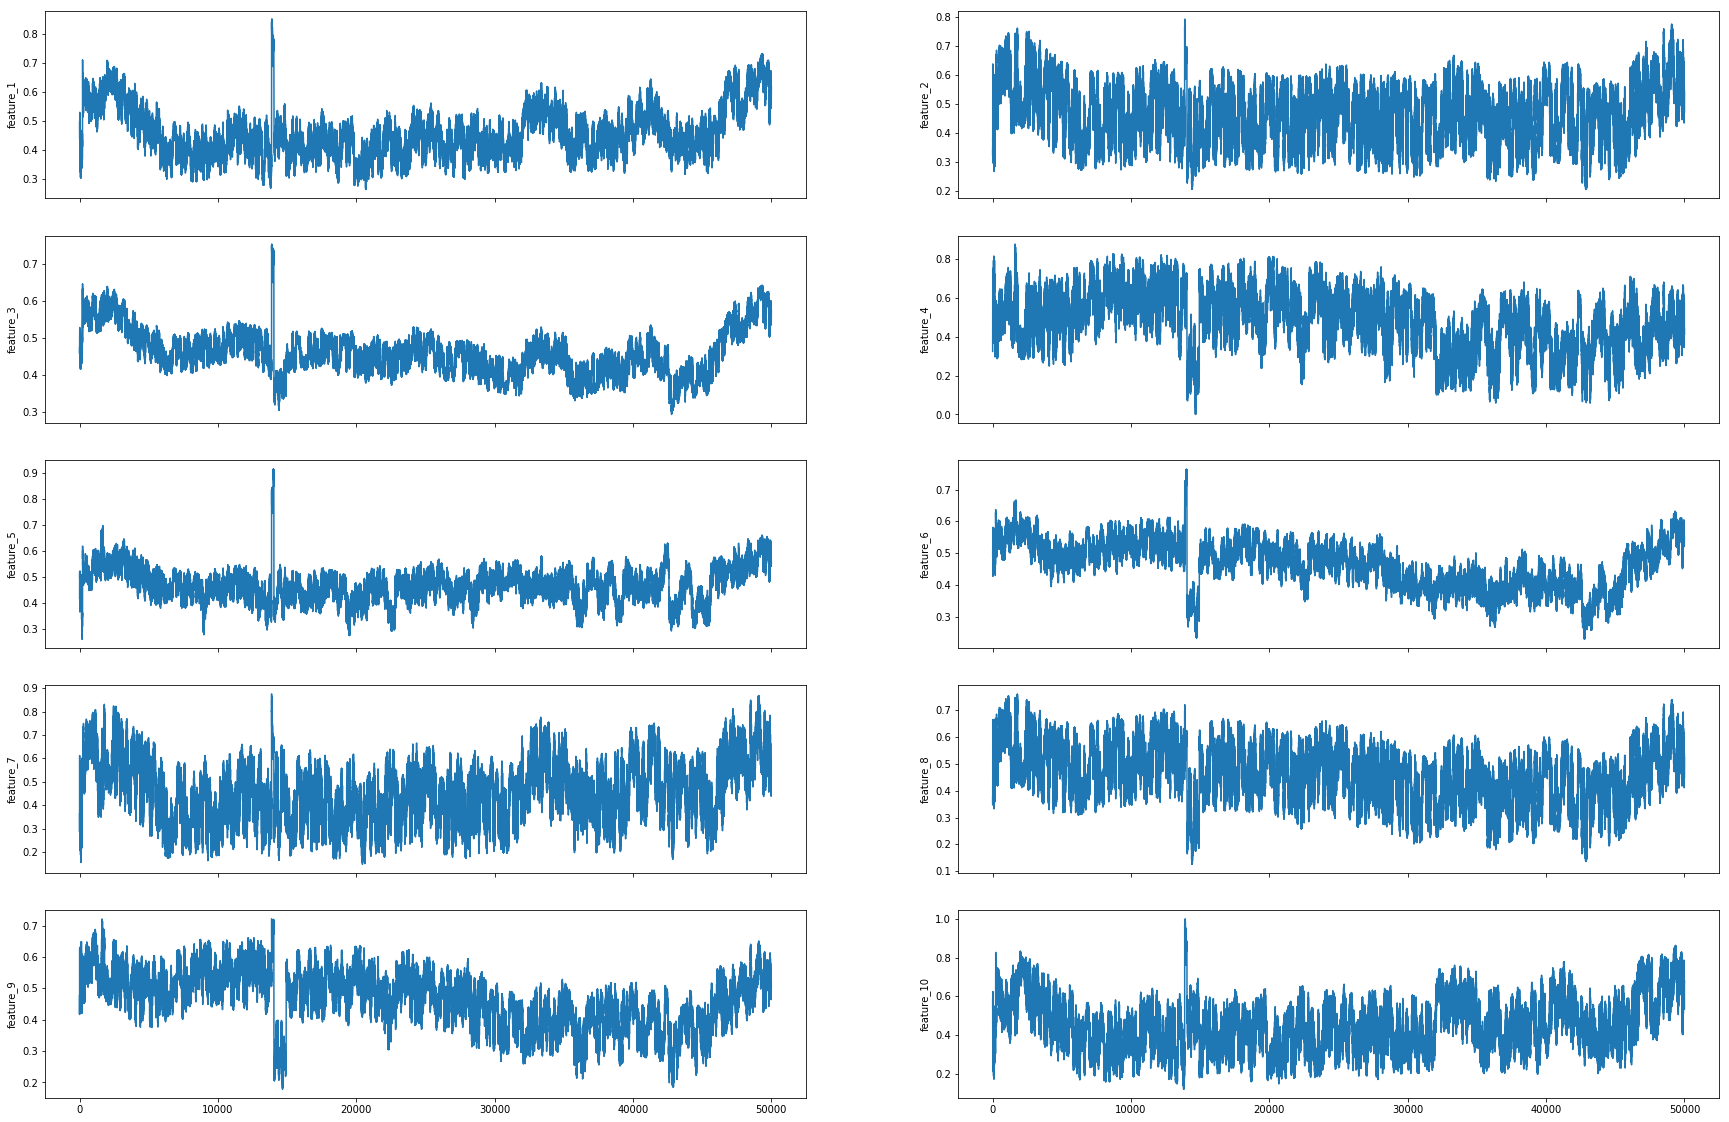

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Small Error

In [10]:
path_original = "../../../data/cpps_data/samples_obs_space_small_error_sinusoid_20190624091401.csv"
df_original = pd.read_csv(path_original, sep=";")

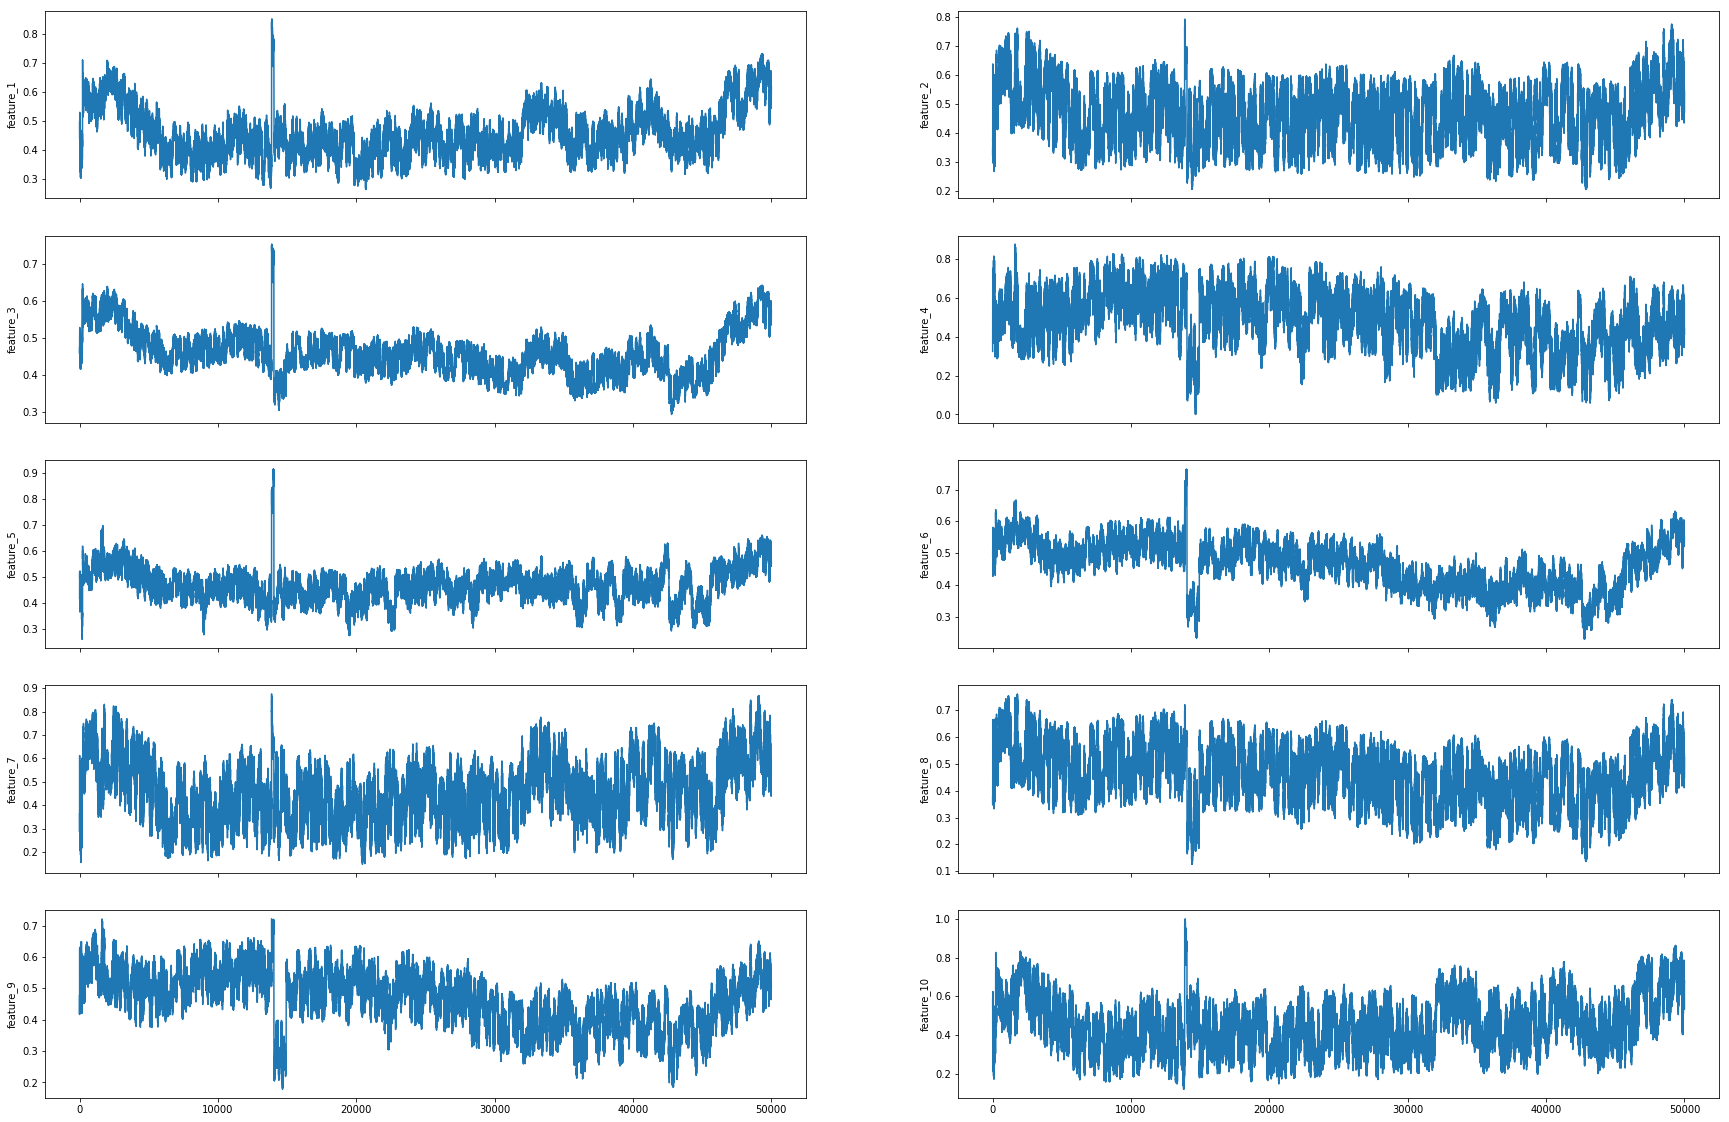

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Large error

In [12]:
path_original = "../../../data/cpps_data/samples_obs_space_large_error_sinusoid_20190624091401.csv"
df_original = pd.read_csv(path_original, sep=";")

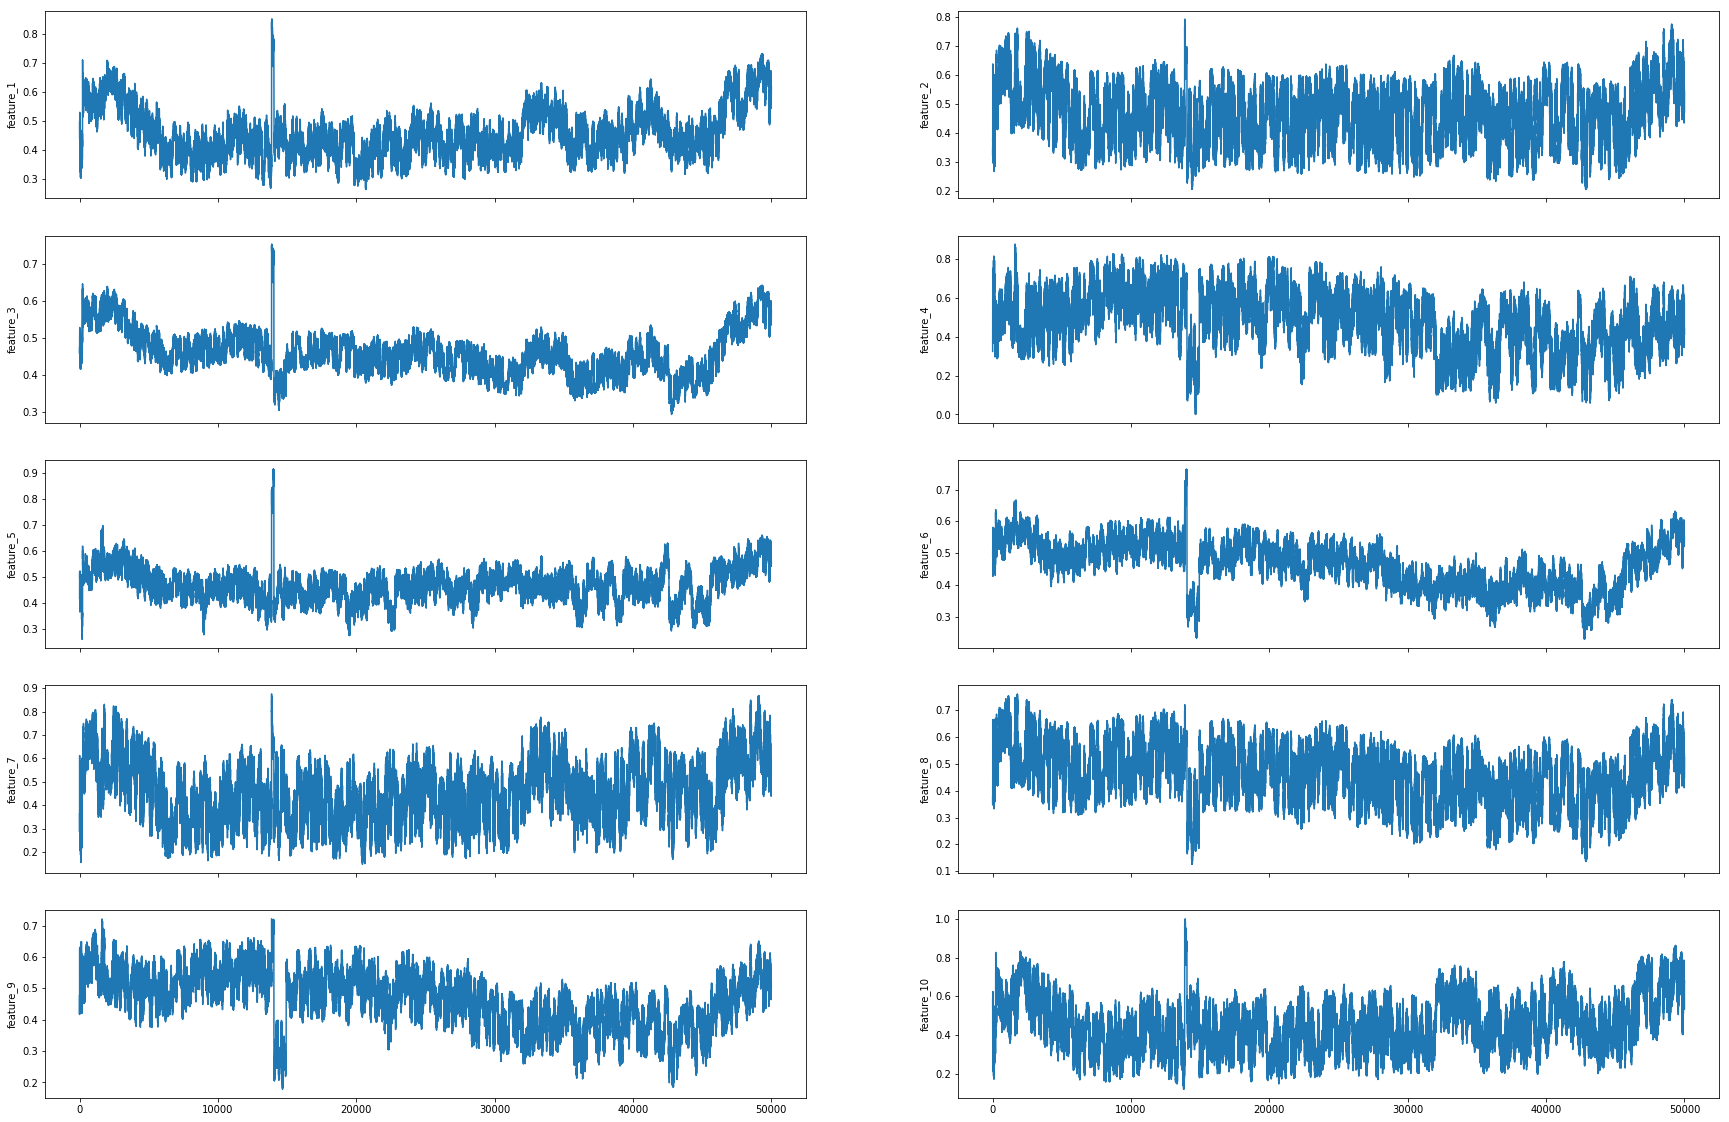

In [13]:
fig, axes = plt.subplots(5, 2, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(0,10):
    sns.lineplot(x=range(df_original.shape[0]), y=df_original.iloc[:,i], ax=ax[i])
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Augmented Dickey-Fuller Test for Testing Stationarity
If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
Following time series are non-stationary:
- cut torque
- cut position
- film position

In [15]:
for i in range(5, len(df_original.columns)):
    time_series = df_original.iloc[:,i].values
    result = adfuller(time_series)
    print("Test for: {}".format(df_original.columns[i]))
    print('p-value: {}'.format(result[1]))
    if result[1] >= 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")
    print('-'*10)

Test for: IONGAUGEPRESSURE
p-value: 0.0
Time series is stationary
----------
Test for: ETCHBEAMVOLTAGE
p-value: 0.0
Time series is stationary
----------
Test for: ETCHBEAMCURRENT
p-value: 0.0
Time series is stationary
----------


KeyboardInterrupt: 

## Correlation of sensor time series

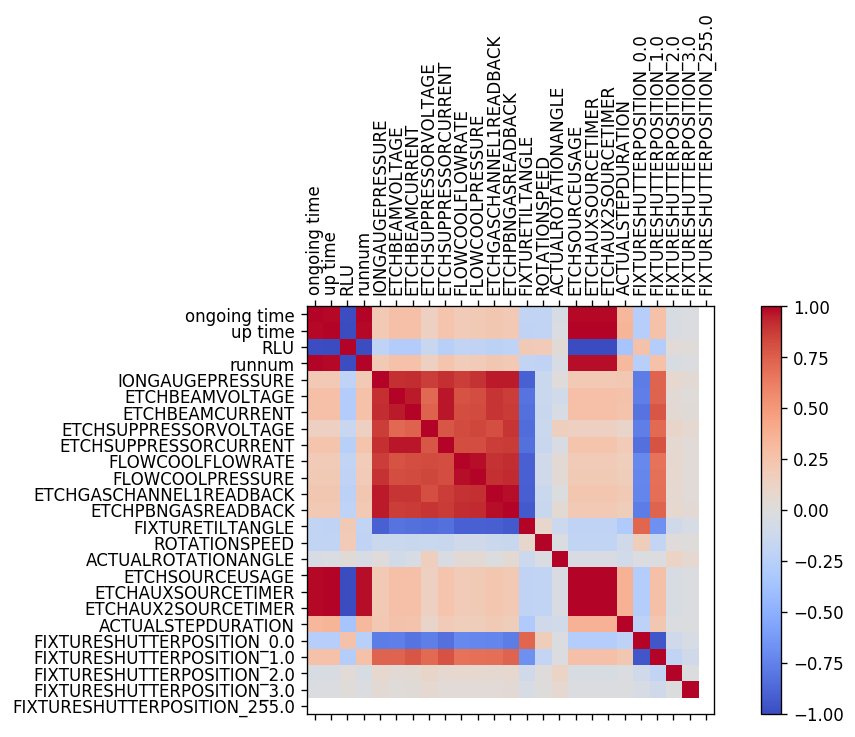

In [16]:
corr = df_original.corr()
fig = plt.figure(figsize=(10,4.5), dpi=120)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_original.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_original.columns)
ax.set_yticklabels(df_original.columns)
plt.show()

## Autocorrelation

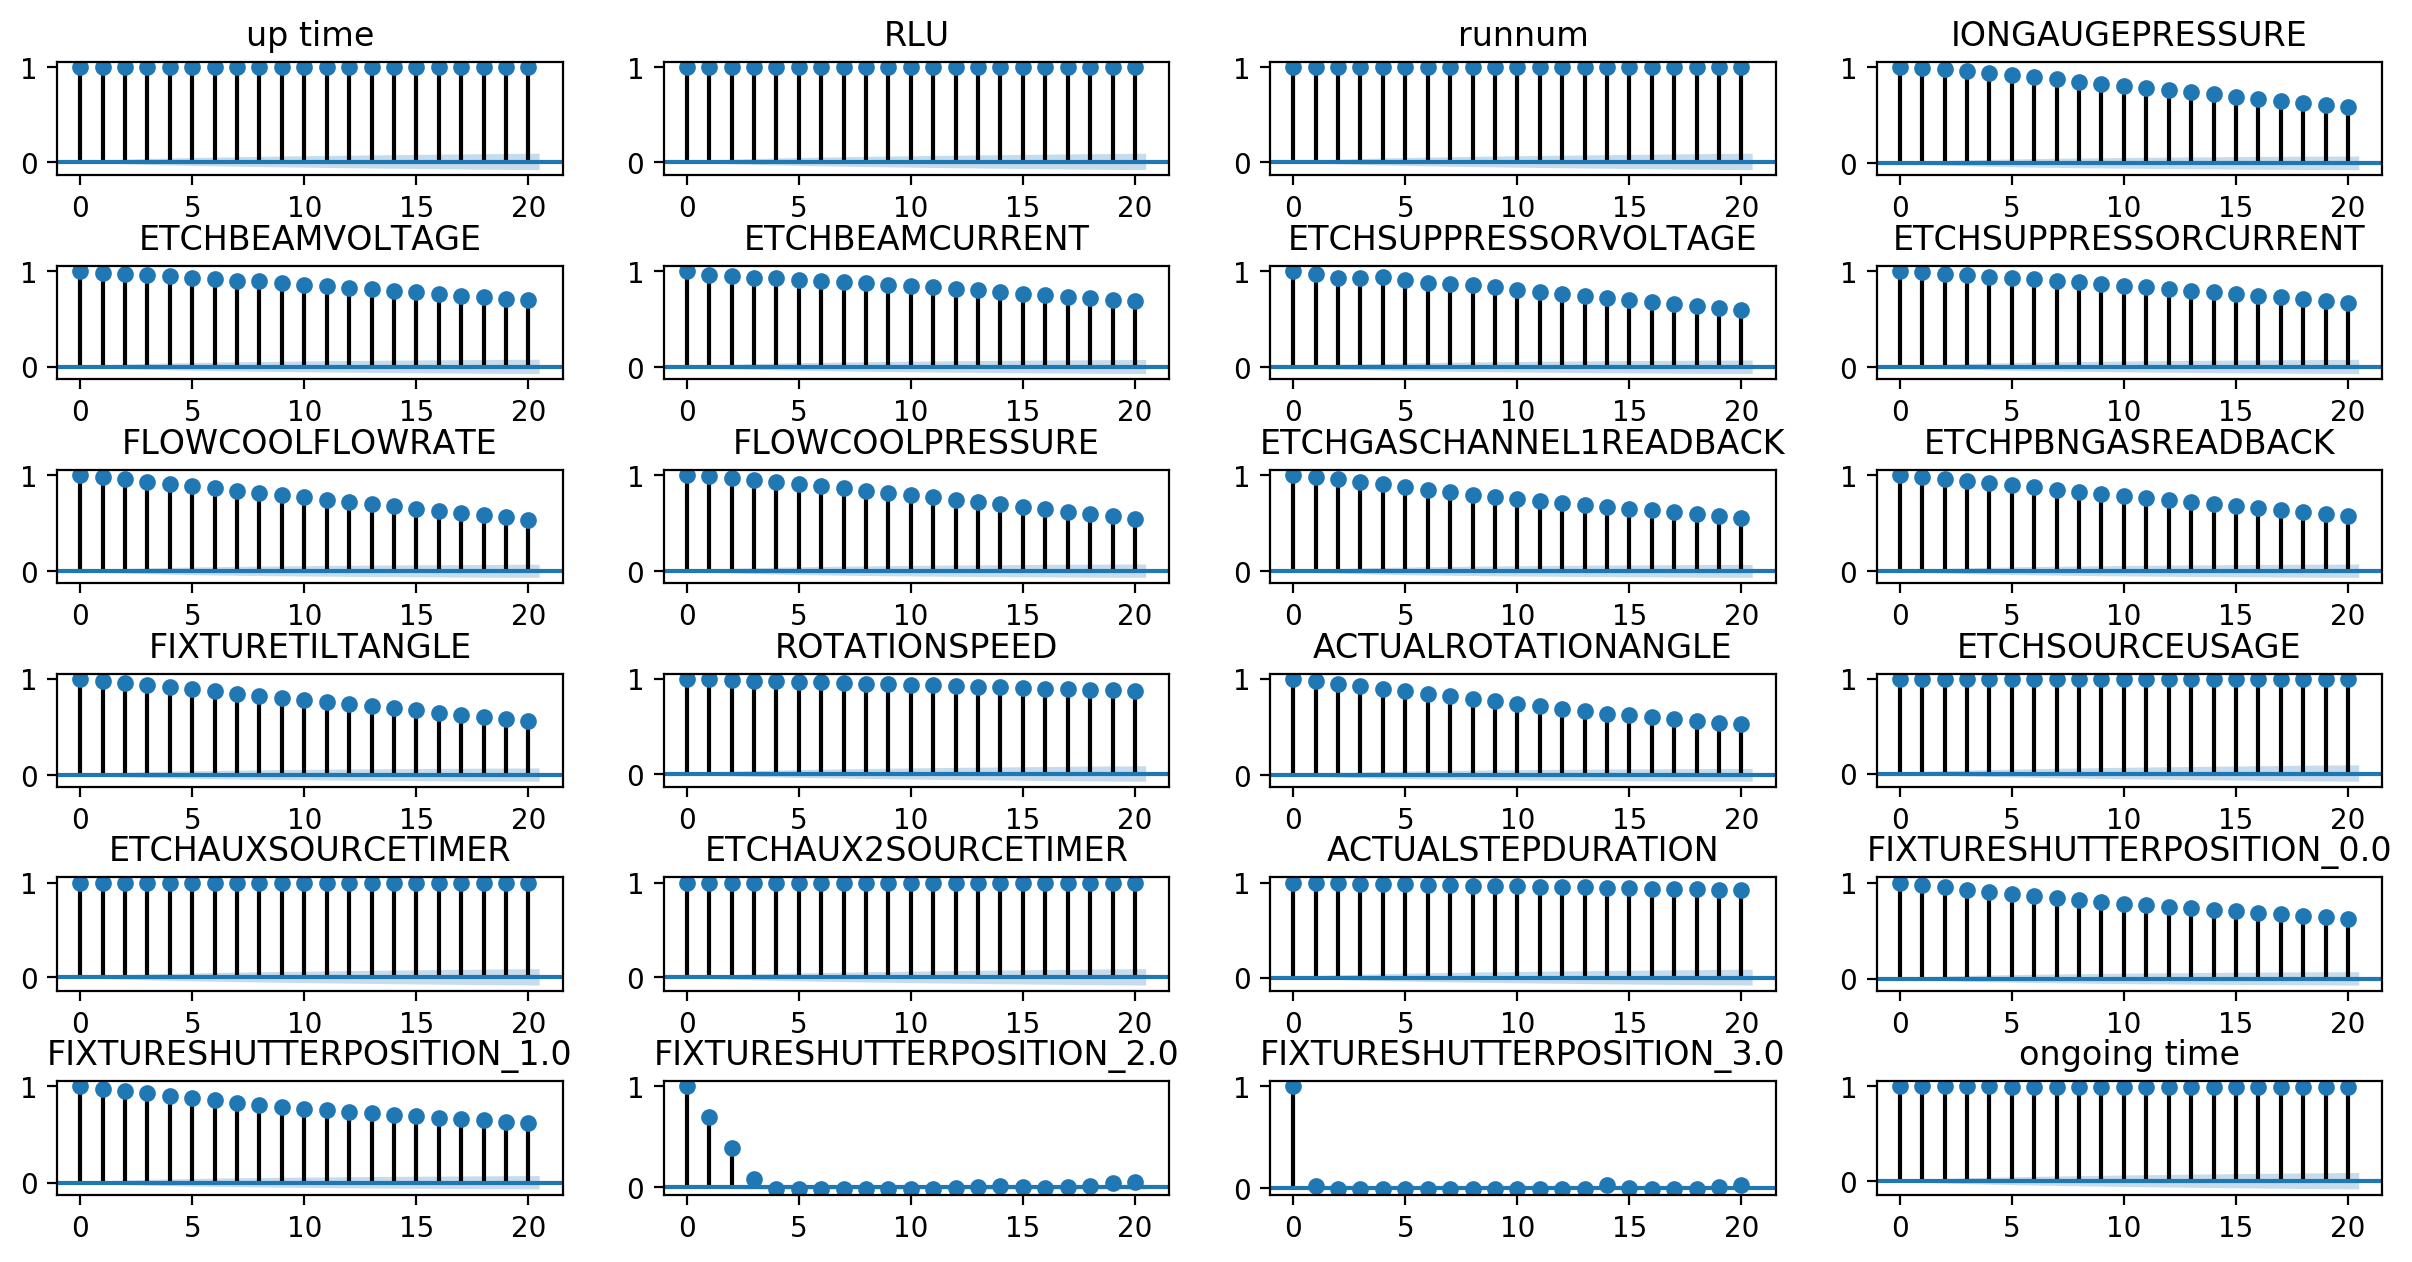

In [22]:
fig, axes = plt.subplots(6, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(0,24):
    plot_acf(df_original.iloc[:,i], lags=20, ax=ax[i-1])
    ax[i-1].set_title(df_original.columns[i])
#plt.savefig("../graphs/raw_sensor_data_autocorrelation.png")
plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

## Histogramm 

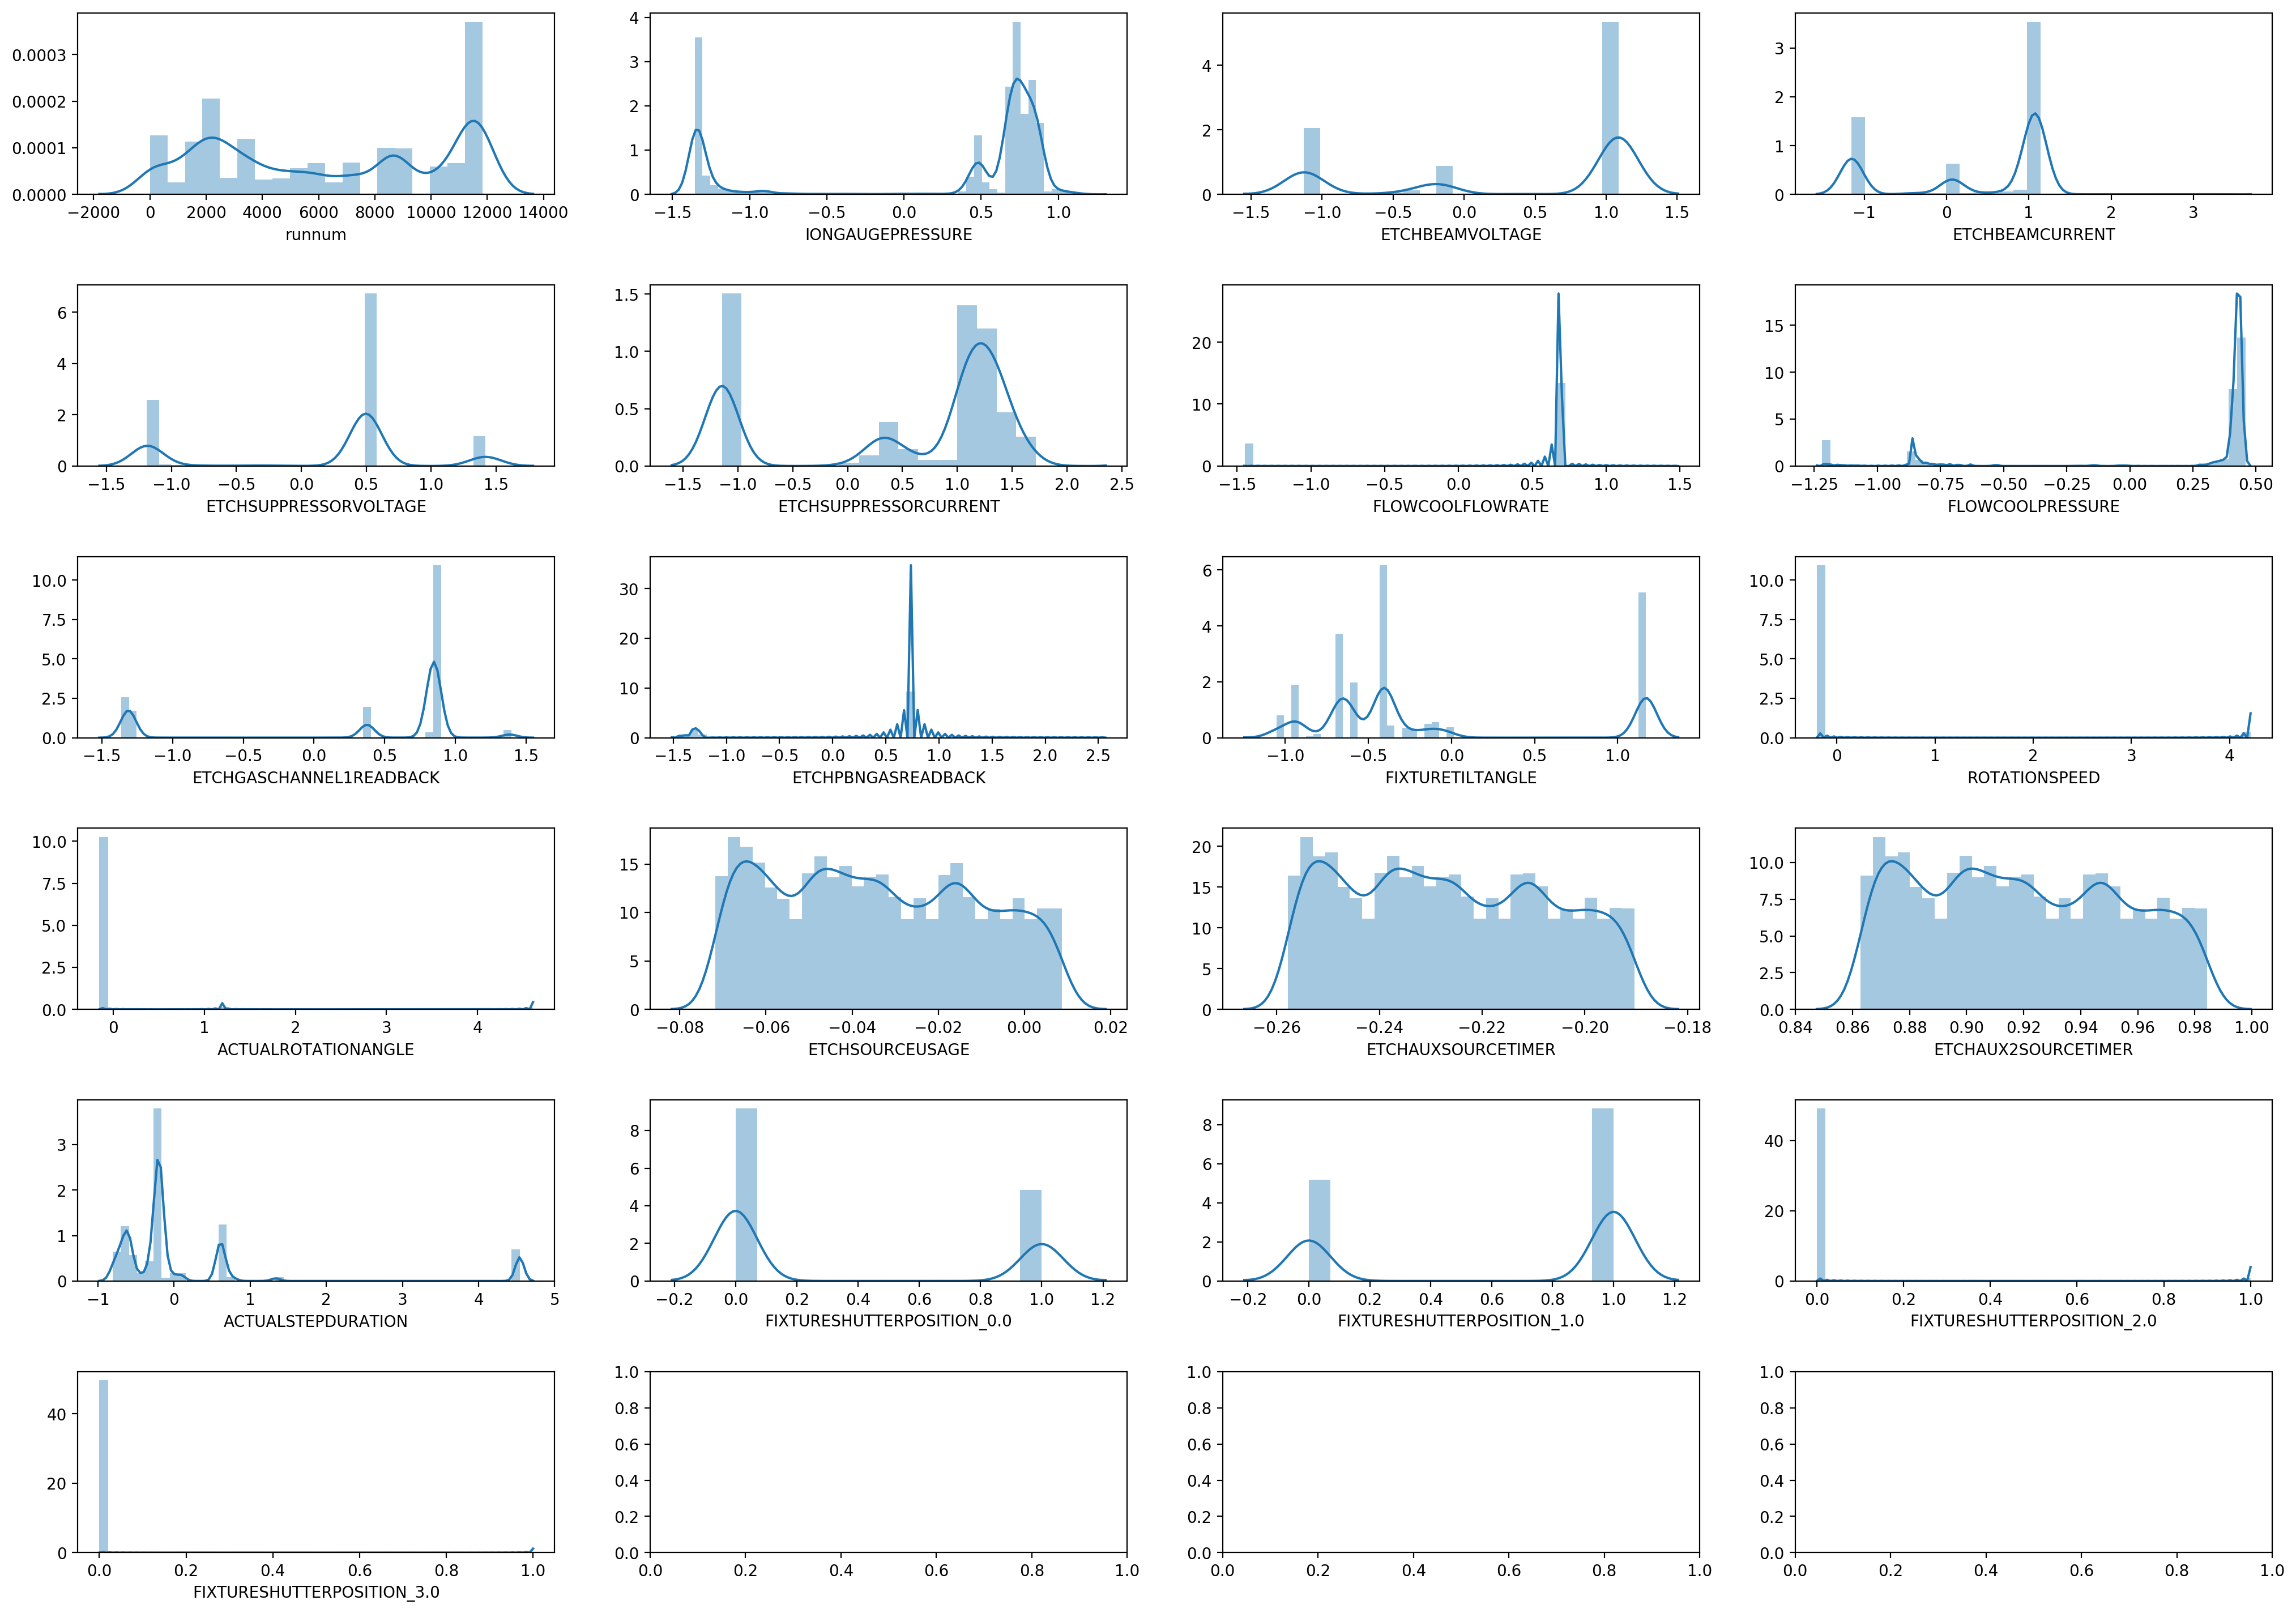

In [33]:
fig, axes = plt.subplots(6, 4, figsize=(25,18), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
for i in range(3, 24):
    sns.distplot(df_original.iloc[:,i], ax=ax[i-3])
#plt.savefig("../graphs/raw_sensor_data_histogramm.png")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()